# A simple Euler exercise: dropping a ball from a height of y0

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import csv, time, os

### Debug/Output Options

In [2]:
DEBUG = True
UPPER_LIMIT = 1000

# Output Files

GENERATE_CSV_FILE = True
GENERATE_GRAPH_IMAGE_FILE = True

# Rounding

ROUND_VALUES = True
NUM_DECIMALS = 3 # how many decimals to round to

### File Generation (For Debugging or Spreadsheeting Purposes)

In [38]:
timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
OUTPUT_DIR = f'./tests/test_{timestr}/'

if GENERATE_GRAPH_IMAGE_FILE or GENERATE_CSV_FILE:
    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)

output_csv_file = None
csv_writer = None

if GENERATE_CSV_FILE:
    output_csv_filepath = f'./{OUTPUT_DIR}/output.csv'
    output_csv_file = open(output_csv_filepath, mode='w', newline='')
    csv_writer = csv.writer(output_csv_file)
    
    header = [ 
        'Time (t)', 
        'Position (y)', 
        'Velocity (vy)', 
        'Time Step (dt)', 
        'Net Force (fn)', 
        'Mass (m)'
    ]

    csv_writer.writerow(header)

## Initial Variables

### Ball Characteristics

In [39]:
density = 50 # kg/m^3
radius = 0.06 # m
volume = (4/3) * np.pi * radius ** 3
mass = density * volume
area = np.pi * radius ** 2

### Environment Characteristics

In [40]:
TOWER_HEIGHT = 40 # meters
GRAVITY_ACCELERATION = 9.806 # m/s^2
AIR_DENSITY = 1.2 # kg/m^3
STYROFOAM_DRAG_COEFFICIENT = 0.5

### Simulation Constants

Initial Values

In [41]:
y0 = TOWER_HEIGHT
vy0 = 0 # m/s
dt = 0.001 # s

The Unreasonable Upper Bound is our absolute maximum value for the number of times our while loop can run. This is so that your PC does not explode in the case that you mess up the program and it runs either infinitely or long enough that it might as well be infinite. This should be set to some realistic value where it should not ever run for more iterations than this.

In [42]:
UNREASONABLE_UPPER_BOUND = 100000 # seconds

Variables

In [43]:
t = 0.0
y = y0
vy = vy0
ay = 0

Data Arrays

In [44]:
ydata = []
vydata = []
tdata = []

## Expected Value Calculations

### Falling Time

$$\Delta t_{f-i} = \frac{\vec{v}_{y0}}{g} + \sqrt{\left( \frac{\vec{v}_{y0}^{2}}{g^2} + \frac{2y_{0}}{g} \right)}$$

This allows us to determine what our falling time is guaranteed to be for both debugging purposes (DO NOT let the while loop run infinitely. *ALWAYS* set an upper bound of some kind.)

Note that I'm using both this and the UNREASONABLE_UPPER_BOUND because this is a calculated value, and as such, things could get weird. (Imagine we had a 'None' type variable somewhere in it's calculation)

In [45]:
fall_time = ((vy0 / GRAVITY_ACCELERATION) + 
             ((vy0 ** 2) / (GRAVITY_ACCELERATION ** 2) + 
             (2 * y0) / GRAVITY_ACCELERATION) ** 0.5)

### Expected Movement Pattern

$$t_{an} = \left\{n \in \mathbb{R} | 0 \le n \le \Delta t_{f-i} \text{ or } 100 \right\}$$

$$\vec{y}_{an} = \vec{y}_{0} + \vec{v}_{y0} g t_{an}^2$$

In [46]:
t_an = np.linspace(0, fall_time, 100)
y_an = y0 + vy0 * t_an - 0.5 * GRAVITY_ACCELERATION * t_an ** 2

## Euler Simulation

### Gravitational Force

$$\vec{F}_{g} = m \times g$$

In [47]:
gravitational_force = mass * GRAVITY_ACCELERATION

### Drag Force

$$\vec{F}_{D} = \pm \frac{1}{2} C_{D} \rho A \vec{v}^2$$

In [48]:
def calculate_drag_force(drag_coefficient, density, surface_area, velocity):
    return 0.5 * drag_coefficient * density * surface_area * (velocity ** 2);

### Net Force

$$
\begin{align}
\vec{F}_{net_{y}} 
&= \vec{F}_{D} - \vec{F}_{g} \\
&= \frac{1}{2} C_{D} \rho A \vec{v}^2 - mg \\
&= \frac{1}{2} C_{D} \rho (2 \pi r) \vec{v}^2 - mg
\end{align}
$$

In [49]:
def calculate_net_force(mass, drag_coefficient, air_density, cross_section_surface_area, y_velocity):
    return (calculate_drag_force(drag_coefficient, air_density, 
                cross_section_surface_area, y_velocity) - gravitational_force) 

## Euler's Method Iterations

At every step, we perform the following calculations in this order:

$$y(t + \delta t) = y(t) + \vec{v}_{y}(t) \delta t$$

$$\vec{v}_{y}(t + \delta t) = v_{y}(t) + \vec{a}_{y}(t) \delta t$$

$$\vec{a}_{y} = \vec{F}_{net}(t) = \frac{\frac{1}{2} C_{D} \rho (2 \pi r) \vec{v}^2 - mg}{m}$$

In [50]:
# Calculate Net Force and Acceleration for t0 
net_force = None
ay = -GRAVITY_ACCELERATION

while (y >= 0 and 
       # Upper Bounds 
       t < UNREASONABLE_UPPER_BOUND):
    
    ydata.append(y)     # store the current y position
    vydata.append(vy)   # store current velocity
    tdata.append(t)     # store current time

    # Update the position in the y direction
    y = y + vy * dt
    
    # Update the velocity in the y direction
    vy = vy + ay * dt
    print(y, vy)
    
    # Recalculate our net force
    net_force = calculate_net_force(mass, STYROFOAM_DRAG_COEFFICIENT, 
                                    AIR_DENSITY, area, vy)
    
    # in this case ay is constant so we could define it outside the loop
    ay = net_force / mass
    
    # Increment the time by the time step
    t = t + dt
    
    if GENERATE_CSV_FILE:
        data = [ t, y, vy, dt, net_force, mass ]
        if ROUND_VALUES:
            data = [ round(elem, NUM_DECIMALS) for elem in data ]
        csv_writer.writerow(data)

40.0 -0.009805999999999999
39.999990194 -0.019611992788177296
39.99997058200721 -0.02941796394090771
39.999941164043264 -0.03922389903466253
39.99990194014423 -0.04902978364609337
39.99985291036058 -0.05883560335211704
39.999794074757226 -0.0686413437300004
39.999725433413495 -0.07844699035744522
39.99964698642314 -0.08825252881267301
39.999558733894325 -0.09805794467450987
39.99946067594965 -0.10786322352247134
39.99935281272613 -0.11766835093684719
39.99923514437519 -0.12747331249878627
39.999107671062696 -0.1372780937903813
39.99897039296891 -0.1470826803947537
39.998823310288515 -0.1568870578961383
39.99866642323062 -0.16669121187996816
39.998499732018736 -0.1764951279329593
39.998323236890805 -0.1862987916431955
39.998136938099165 -0.19610218860021292
39.99794083591056 -0.2059053043950849
39.997734930606164 -0.21570812462050654
39.99751922248154 -0.2255106348708795
39.99729371184667 -0.2353128207423965
39.99705839902593 -0.24511466783312608
39.9968132843581 -0.25491616174309706
39

## Plotting the Data

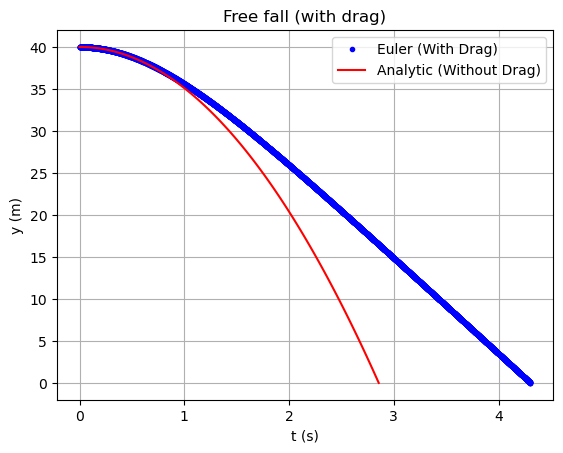

In [51]:
plt.plot(tdata, ydata, "b.", label="Euler (With Drag)")
plt.plot(t_an, y_an,  "r", label="Analytic (Without Drag)")
plt.title("Free fall (with drag)")
plt.xlabel("t (s)")
plt.ylabel("y (m)")
plt.legend()
plt.grid(True)
if GENERATE_GRAPH_IMAGE_FILE:
    plt.savefig(f'{OUTPUT_DIR}/graph.png')
plt.show()

In [52]:
if GENERATE_CSV_FILE:
    output_csv_file.close()